4. Transpose the ORL face dataset to let 𝐗 be a 2576 × 400 data matrix. Apply PCA to 𝐗, using the PCA function you created in EX3 above.

In [ ]:
from PIL import Image
import numpy as np
from numpy import array
from tkinter import _flatten
from sklearn.linear_model import Lasso 
from sklearn.linear_model import Ridge 
import math
import matplotlib.pyplot as plt
import os


In [ ]:
import numpy

# 1 - 0, 2 - 1, 3 - 1, 4 - 1, 5 - 1, 6 - 1, 7 - 1, 8 - 0, 9 - 1, 10 - 0, 11 - 1, 12 - 0, 13 - 1, 14 - 1, 15 - 1
# 16 - 1, 17 - 1, 18 - 1, 19 - 1, 20 - 1, 21 - 1, 22 - 1, 23 - 1, 24 - 1, 25 - 1, 26 - 1, 27 - 1, 28 - 1, 29 - 1, 30 - 1
# 31 - 1, 32 - 0, 33 - 1, 34 - 1, 35 - 1, 36 - 1, 37 - 1, 38 - 1, 39 - 1, 40 - 1  
gender = [0, 1, 1, 1, 1, 1, 1, 0, 1, 0,1, 0, 1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1]
len(gender)

final = []
for i in gender:
  if i == 0:
    for j in range(0,10):
      final.append(0)
    #new_list = [0,0,0,0,0,0,0,0,0,0]
  else:
    for j in range(0,10):
      final.append(1)


 
gender = np.asarray(final)
gender = np.expand_dims(gender, axis=1)
gender.shape




(400, 1)

In [ ]:
from PIL import Image


def load_images_from_folder(folder):
  i = 1
  for filename in os.listdir(folder):
    im = Image.open(os.path.join(folder,filename))
    data = np.array(im)
    flattened = data.flatten()
    reshape_fla = np.expand_dims(flattened, axis=0)
    if i == 1:
      final = reshape_fla
      i = 2
    else:
      final = np.vstack((final,reshape_fla))

  return final


pixels = load_images_from_folder('/content/drive/MyDrive/Colab Notebooks/homework_5/faces')

pixels.shape

X = pixels

a. (10%) How many principal components are needed to explain 50%, 60%, 70%, 80%, and 90% of the total
variance?

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.preprocessing import StandardScaler

def plot_eigvals(eigVals): 
  count = 0
  x_axis=[]
  y = []
  y_culmulated = []
  total_val = eigVals.sum() 
  y_culmulated.append(eigVals[0]/total_val) 
  for i in range(0,len(eigVals)):
    x_axis.append(i) 
    y.append(eigVals[i]/total_val) 

    if i !=0 :
      y_culmulated.append((eigVals[i]/total_val+y_culmulated[i-1]))      

      if y_culmulated[-1] > 0.5 and count == 0:
        print("it was necessary " + str(len(y_culmulated))+" components for 50% variance")
        count = 1
      
      elif y_culmulated[-1] > 0.6 and count == 1:
        print("it was necessary " + str(len(y_culmulated))+" components for 60% variance")
        count = 2

      elif y_culmulated[-1] > 0.7 and count == 2:
        print("it was necessary " + str(len(y_culmulated))+" components for 70% variance")
        count = 3
  
      elif y_culmulated[-1] > 0.8 and count == 3:
        print("it was necessary " + str(len(y_culmulated))+" components for 80% variance")
        count = 4  

      elif y_culmulated[-1] > 0.9 and count == 4:
        print("it was necessary " + str(len(y_culmulated))+" components for 90% variance")
        count = 5

  fig, ax1 = plt.subplots()
  ax2 = ax1.twinx() 


  ax2.set_xlabel("PC numbers")
  ax1.set_ylabel("Variance")
  ax1.bar(x_axis, eigVals, color="blue")


  ax2.set_ylabel("Cumulative Percentage") 
  ax2.plot(x_axis,y_culmulated , color="red")


def onedin_plot(projected_X):
  result = pd.DataFrame(projected_X, columns=['PC1'])
  result['y-axis'] = 0.0
  sns.lmplot('PC1', 'y-axis', data=result, fit_reg=False)

  # title
  plt.title('PCA result')

  


def pca_function(X, isCorrMX):
  features = X.T
  if isCorrMX == True:
    matrix = np.corrcoef(features)
  else:
    matrix = np.cov(features)

  eig_vals, eig_vecs = np.linalg.eig(matrix)
  eig_vals[0]/sum(eig_vals)
  projected_X = X.dot(eig_vecs.T[0])

  onedin_plot(projected_X)
  plot_eigvals(eig_vals)


  return matrix, eig_vals, eig_vecs


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:630: ComplexWarning: Casting complex values to real discards the imaginary part
  xys = np.asarray(data[[x, y]]).astype(float)
/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:153: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/transforms.py:789: ComplexWarning: Casting complex values to real discards the imaginary part
  points = np.array(args, dtype=float).reshape(2, 2)


it was necessary 6 components for 50% variance
it was necessary 9 components for 60% variance
it was necessary 17 components for 70% variance
it was necessary 34 components for 80% variance
it was necessary 79 components for 90% variance


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


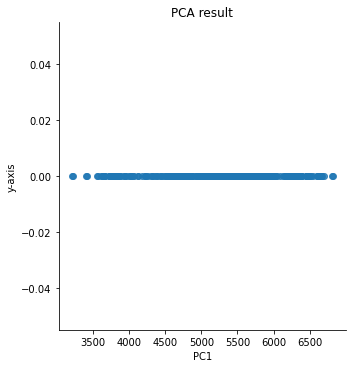

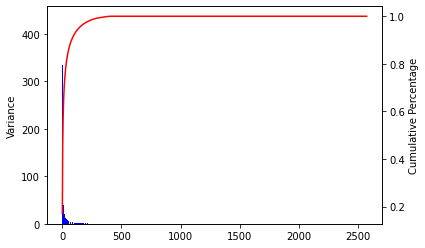

In [ ]:
matrix, eig_vals, eig_vecs = pca_function(X, True)

In [ ]:
# eigen vector and eigen values from correlation matrix 
print('Load Matrix \n%s' %matrix)
print('Eigenvector \n%s' %eig_vecs)
print('Eigenvalues \n%s' %eig_vals)

Load Matrix 
[[ 1.          0.99805448  0.99539744 ... -0.04092392 -0.06217686
  -0.03358896]
 [ 0.99805448  1.          0.99755336 ... -0.04238136 -0.06305265
  -0.0314054 ]
 [ 0.99539744  0.99755336  1.         ... -0.04299081 -0.06004523
  -0.02733557]
 ...
 [-0.04092392 -0.04238136 -0.04299081 ...  1.          0.90625009
   0.82079334]
 [-0.06217686 -0.06305265 -0.06004523 ...  0.90625009  1.
   0.94361423]
 [-0.03358896 -0.0314054  -0.02733557 ...  0.82079334  0.94361423
   1.        ]]
Eigenvector 
[[ 0.01757966+0.j          0.02796559+0.j          0.03828835+0.j
  ... -0.00182406-0.00061826j -0.00182406+0.00061826j
  -0.00281772+0.j        ]
 [ 0.01751104+0.j          0.02819481+0.j          0.03836737+0.j
  ... -0.00036497+0.00020164j -0.00036497-0.00020164j
  -0.00024581+0.j        ]
 [ 0.01808453+0.j          0.02765299+0.j          0.03859395+0.j
  ...  0.00018517-0.00058752j  0.00018517+0.00058752j
  -0.00070176+0.j        ]
 ...
 [-0.0159241 +0.j          0.00522833+0.j   

b. (10%) Rescale the first principal component (PC) into the range of [0, 255]. Reshape the first PC (initially
an 2576 × 1 vector) into a 46 × 56 matrix. Plot an image from the 46 × 56 matrix using the rescaled PC scores as the grayscale values.

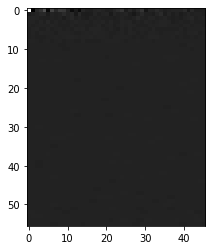

In [ ]:
PC1 = X@eig_vecs
PC1 = PC1[0].reshape(56,46).real
imgplot = plt.imshow(PC1, cmap='gray')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


it was necessary 2 components for 50% variance
it was necessary 4 components for 60% variance
it was necessary 7 components for 70% variance
it was necessary 17 components for 80% variance
it was necessary 50 components for 90% variance


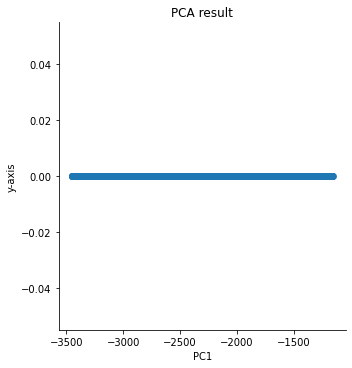

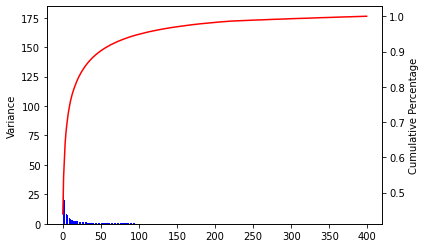

In [ ]:
matrix, eig_vals, eig_vecs = pca_function(X.T, True)

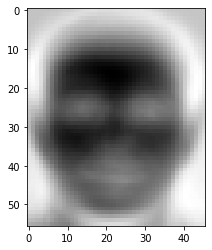

In [11]:
PC1 = X.T@eig_vecs
PC1 = PC1.T[0].reshape(56,46).real
imgplot = plt.imshow(PC1, cmap='gray')
plt.show()